---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

# Assignment 1 - Introduction to Machine Learning

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [24]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [25]:
len(cancer.feature_names)
cancer.data


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

### Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [26]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    # The assignment question description will tell you the general format the autograder is expecting
    
    # YOUR CODE HERE
    return len(cancer.feature_names)
    raise NotImplementedError()

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs
answer_zero()

30

### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

*This function should return a `(569, 31)` DataFrame with * 

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [27]:
c_df = pd.DataFrame(cancer.data) # to convert to df
c_df.columns = cancer.feature_names # add the titles
# c_df

# Need to add the target since the features are essentially output files
# 
cancer.target_names
# cancer.target

array(['malignant', 'benign'], dtype='<U9')

In [28]:
def answer_one():
    # YOUR CODE HERE
    df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    df['target'] = cancer.target
    
    return df.shape
    raise NotImplementedError()

answer_one()

(569, 31)

In [29]:
pd.Series(cancer.target_names, name='target')

0    malignant
1       benign
Name: target, dtype: object

In [30]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
class_distribution = df['target'].value_counts()

# df['target'].value_counts()

# Rename the index to 'malignant' and 'benign'
class_distribution.index = ['malignant', 'benign']



# type(class_distribution)


### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [31]:
def answer_two():
    
    # YOUR CODE HERE
    df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    df['target'] = cancer.target
    class_distribution = df['target'].value_counts()
    class_distribution.index = ['malignant', 'benign']
    
    class_distribution.name = 'target'
    
    return class_distribution
    raise NotImplementedError()

# answer_two()

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where* 
* `X` *has shape* `(569, 30)`
* `y` *has shape* `(569,)`.

In [32]:
# from sklearn.model_selection import train_test_split
X = df.iloc[:,:30].shape
y = df['target'].shape

# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 5)

(X,y)

((569, 30), (569,))

In [33]:
def answer_three():
    # YOUR CODE HERE
    from sklearn.model_selection import train_test_split
    X = df.iloc[:,:30].shape
    y = df['target'].shape
    
    return X,y
    raise NotImplementedError()
# len(answer_three())
# type(answer_three())
# answer_three()[0]

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [34]:
from sklearn.model_selection import train_test_split

def answer_four():
    # YOUR CODE HERE
    X = df.iloc[:,:30]
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)
    return (X_train, X_test, y_train, y_test)
    raise NotImplementedError()
# answer_four()[0].shape


### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a `sklearn.neighbors.classification.KNeighborsClassifier`.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    # YOUR CODE HERE
    knn = KNeighborsClassifier(n_neighbors=1)
    X = df.iloc[:,:30]
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)

    return knn.fit(X_train, y_train)
    
    raise NotImplementedError()
answer_five()

KNeighborsClassifier(n_neighbors=1)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
X = df.iloc[:,:30]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.916083916083916

In [71]:
# knn.predict(X.head()) #predicting first 5 -- 80% accuracy

In [72]:
# df.head()

In [73]:
# df.info()

In [74]:
# from pandas.plotting import scatter_matrix

In [75]:
# %matplotlib notebook
# scatter_matrix(df.iloc[:, :5], diagonal='kde' );

### Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

In [87]:
def answer_six():
    # YOUR CODE HERE
    df.mean()[:-1] # excluding the target(y) since it is not a feature
    df.mean()[:-1].values.reshape(1,-1)
    return knn.predict(df.mean()[:-1].values.reshape(1,-1))
    raise NotImplementedError()
# answer_six()

C:\Users\Victor Darkwah-Owusu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [77]:
df.mean()[:-1] # excluding the target(y) since it is not a feature
df.mean()[:-1].values.reshape(1,-1)
knn.predict(df.mean()[:-1].values.reshape(1,-1))
# -1 in the reshape represents the unknown dimension. 
# reshape converts the np array to a 'matrix'

C:\Users\Victor Darkwah-Owusu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [78]:
def answer_seven():
    # YOUR CODE HERE
    
    knn = KNeighborsClassifier(n_neighbors=1)
    
    # data splitting
    X = df.iloc[:,:30]
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)

    # model training
    knn.fit(X_train, y_train)
    
    #model accuracy
    return knn.predict(X_test)
    
    raise NotImplementedError()

# answer_seven()

### Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [79]:
def answer_eight():
    # YOUR CODE HERE
    
    knn = KNeighborsClassifier(n_neighbors=1)
    
    # data splitting
    X = df.iloc[:,:30]
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

    # model training
    knn.fit(X_train, y_train)
    
    #model accuracy
    return knn.score(X_test, y_test)
    raise NotImplementedError()

answer_eight()

0.916083916083916

### Optional plot

Try using the plotting function below to visualize the different predicition scores between train and test sets, as well as malignant and benign cells.

<IPython.core.display.Javascript object>


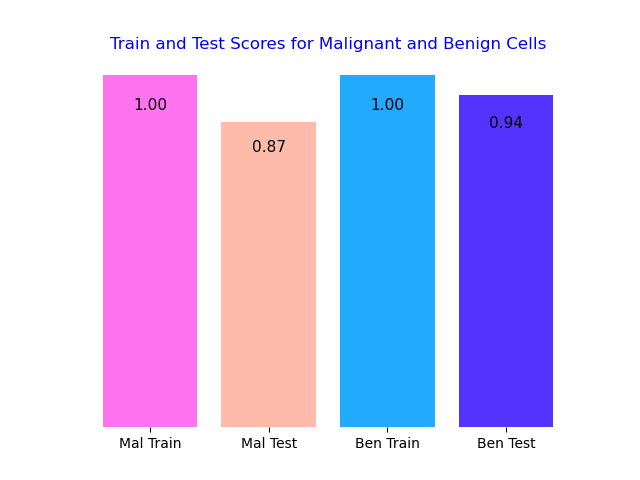

In [148]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook
    
    # YOUR CODE HERE
    mal_xt = X_train[y_train == 0] # X_train values for which y is malign
    ben_xt = X_train[y_train == 1] # X_train vals for which y is benign
    mal_xts = X_test[y_test == 0]
    ben_xts = X_test[y_test == 1]
    mal_yt =  y_train[y_train == 0] 
    ben_yt = y_train[y_train == 1] 
    mal_yts = y_test[y_test == 0]
    ben_yts = y_test[y_test == 1]
    
    vals = [knn.score(mal_xt, mal_yt), knn.score(mal_xts, mal_yts), knn.score(ben_xt, ben_yt) ,knn.score(ben_xts, ben_yts)]
    bars = plt.bar(range(0,4),vals, color=['#ff72f0','#ffbbaa','#22aaff','#5533ff'])
    plt.xticks(range(0,4), ['Mal Train', 'Mal Test', 'Ben Train', 'Ben Test'])

    # plt.gca().spines.set_visible(False)
    plt.setp(plt.gca().spines.values(), visible=False);
    plt.yticks([]);

    plt.title('Train and Test Scores for Malignant and Benign Cells',color = 'blue')

    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height()*0.9, f'{height:.2f}',
                       ha='center', color='black', fontsize=11)
    
    return plt.show()
    raise NotImplementedError()

accuracy_plot()

In [81]:
# Uncomment the plotting function to see the visualization, 
# Comment out the plotting function when submitting your notebook for grading

knn.score(X_train, y_train)

# accuracy_plot() 

1.0

In [82]:
knn.score(X_test, y_test)

0.916083916083916

In [83]:
mal_xt = X_train[y_train == 0] # X_train values for which y is malign

ben_xt = X_train[y_train == 1] # X_train vals for which y is benign

mal_xts = X_test[y_test == 0]

ben_xts = X_test[y_test == 1]

mal_yt =  y_train[y_train == 0] 

ben_yt = y_train[y_train == 1] 

mal_yts = y_test[y_test == 0]

ben_yts = y_test[y_test == 1]


# more like (x_train malig, y_train ben) (x_test mal, y_test ben), etc

In [84]:
# comparing the x,y train-test data. Same can be done for the benign
len(mal_xt), len(mal_xts), len(mal_yt),len(mal_yts)

(159, 53, 159, 53)

In [85]:
knn.score(mal_xt, mal_yt)
knn.score(mal_xts, mal_yts)
knn.score(ben_xt, ben_yt)
knn.score(ben_xts, ben_yts)

0.9444444444444444

In [88]:
import matplotlib.pyplot as plt

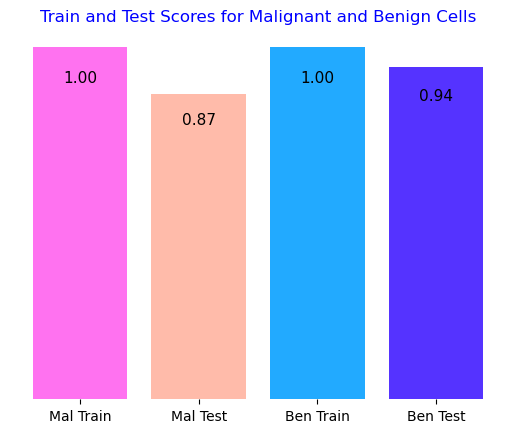

In [146]:
vals = [knn.score(mal_xt, mal_yt), knn.score(mal_xts, mal_yts), knn.score(ben_xt, ben_yt) ,knn.score(ben_xts, ben_yts)]
bars = plt.bar(range(0,4),vals, color=['#ff72f0','#ffbbaa','#22aaff','#5533ff'])
plt.xticks(range(0,4), ['Mal Train', 'Mal Test', 'Ben Train', 'Ben Test'])

# plt.gca().spines.set_visible(False)
plt.setp(plt.gca().spines.values(), visible=False);
plt.yticks([]);

plt.title('Train and Test Scores for Malignant and Benign Cells',color = 'blue')

for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height()*0.9, f'{height:.2f}',
                   ha='center', color='black', fontsize=11)
    
# for the height u can do some additiona and subtraction (eg instead of *0.9, you can use -0.1)

In [12]:
import sklearn

In [13]:
sklearn.show_versions()



System:
    python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Victor Darkwah-Owusu\anaconda3\python.exe
   machine: Windows-10-10.0.22631-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.26.4
        scipy: 1.11.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.2
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True


AttributeError: 'NoneType' object has no attribute 'split'

In [11]:
!pip uninstall scikit-learn

^C
